<a href="https://colab.research.google.com/github/DVN111/Diabetes-Classification-with-Random-Forest-Classifier/blob/main/Diabetes%20Classification%20with%20Random%20Forest%20Classifier%20(Accuracy%2079).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df = df.drop(columns=['Pregnancies','SkinThickness'])

In [7]:
df.nunique()

Glucose                     136
BloodPressure                47
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
df.describe()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().isnull().sum()

Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

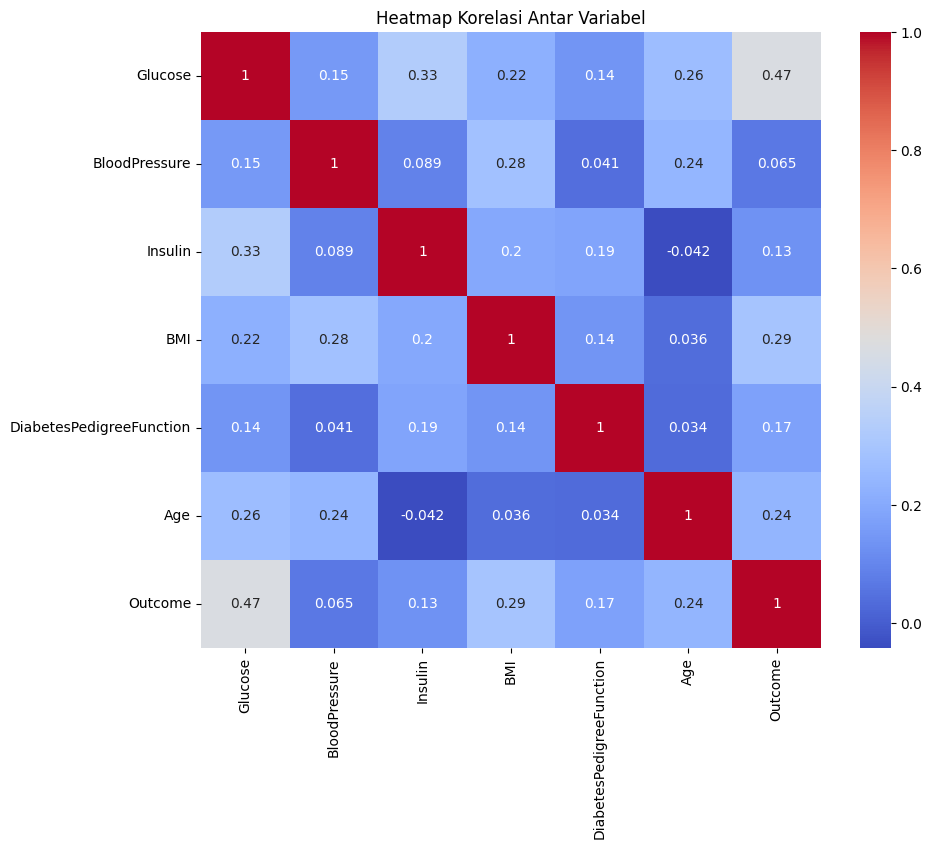

In [6]:
# Hitung korelasi antar variabel
correlation_matrix = df.corr()

# Atur ukuran plot
plt.figure(figsize=(10, 8))

# Buat heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Atur judul dan label
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()


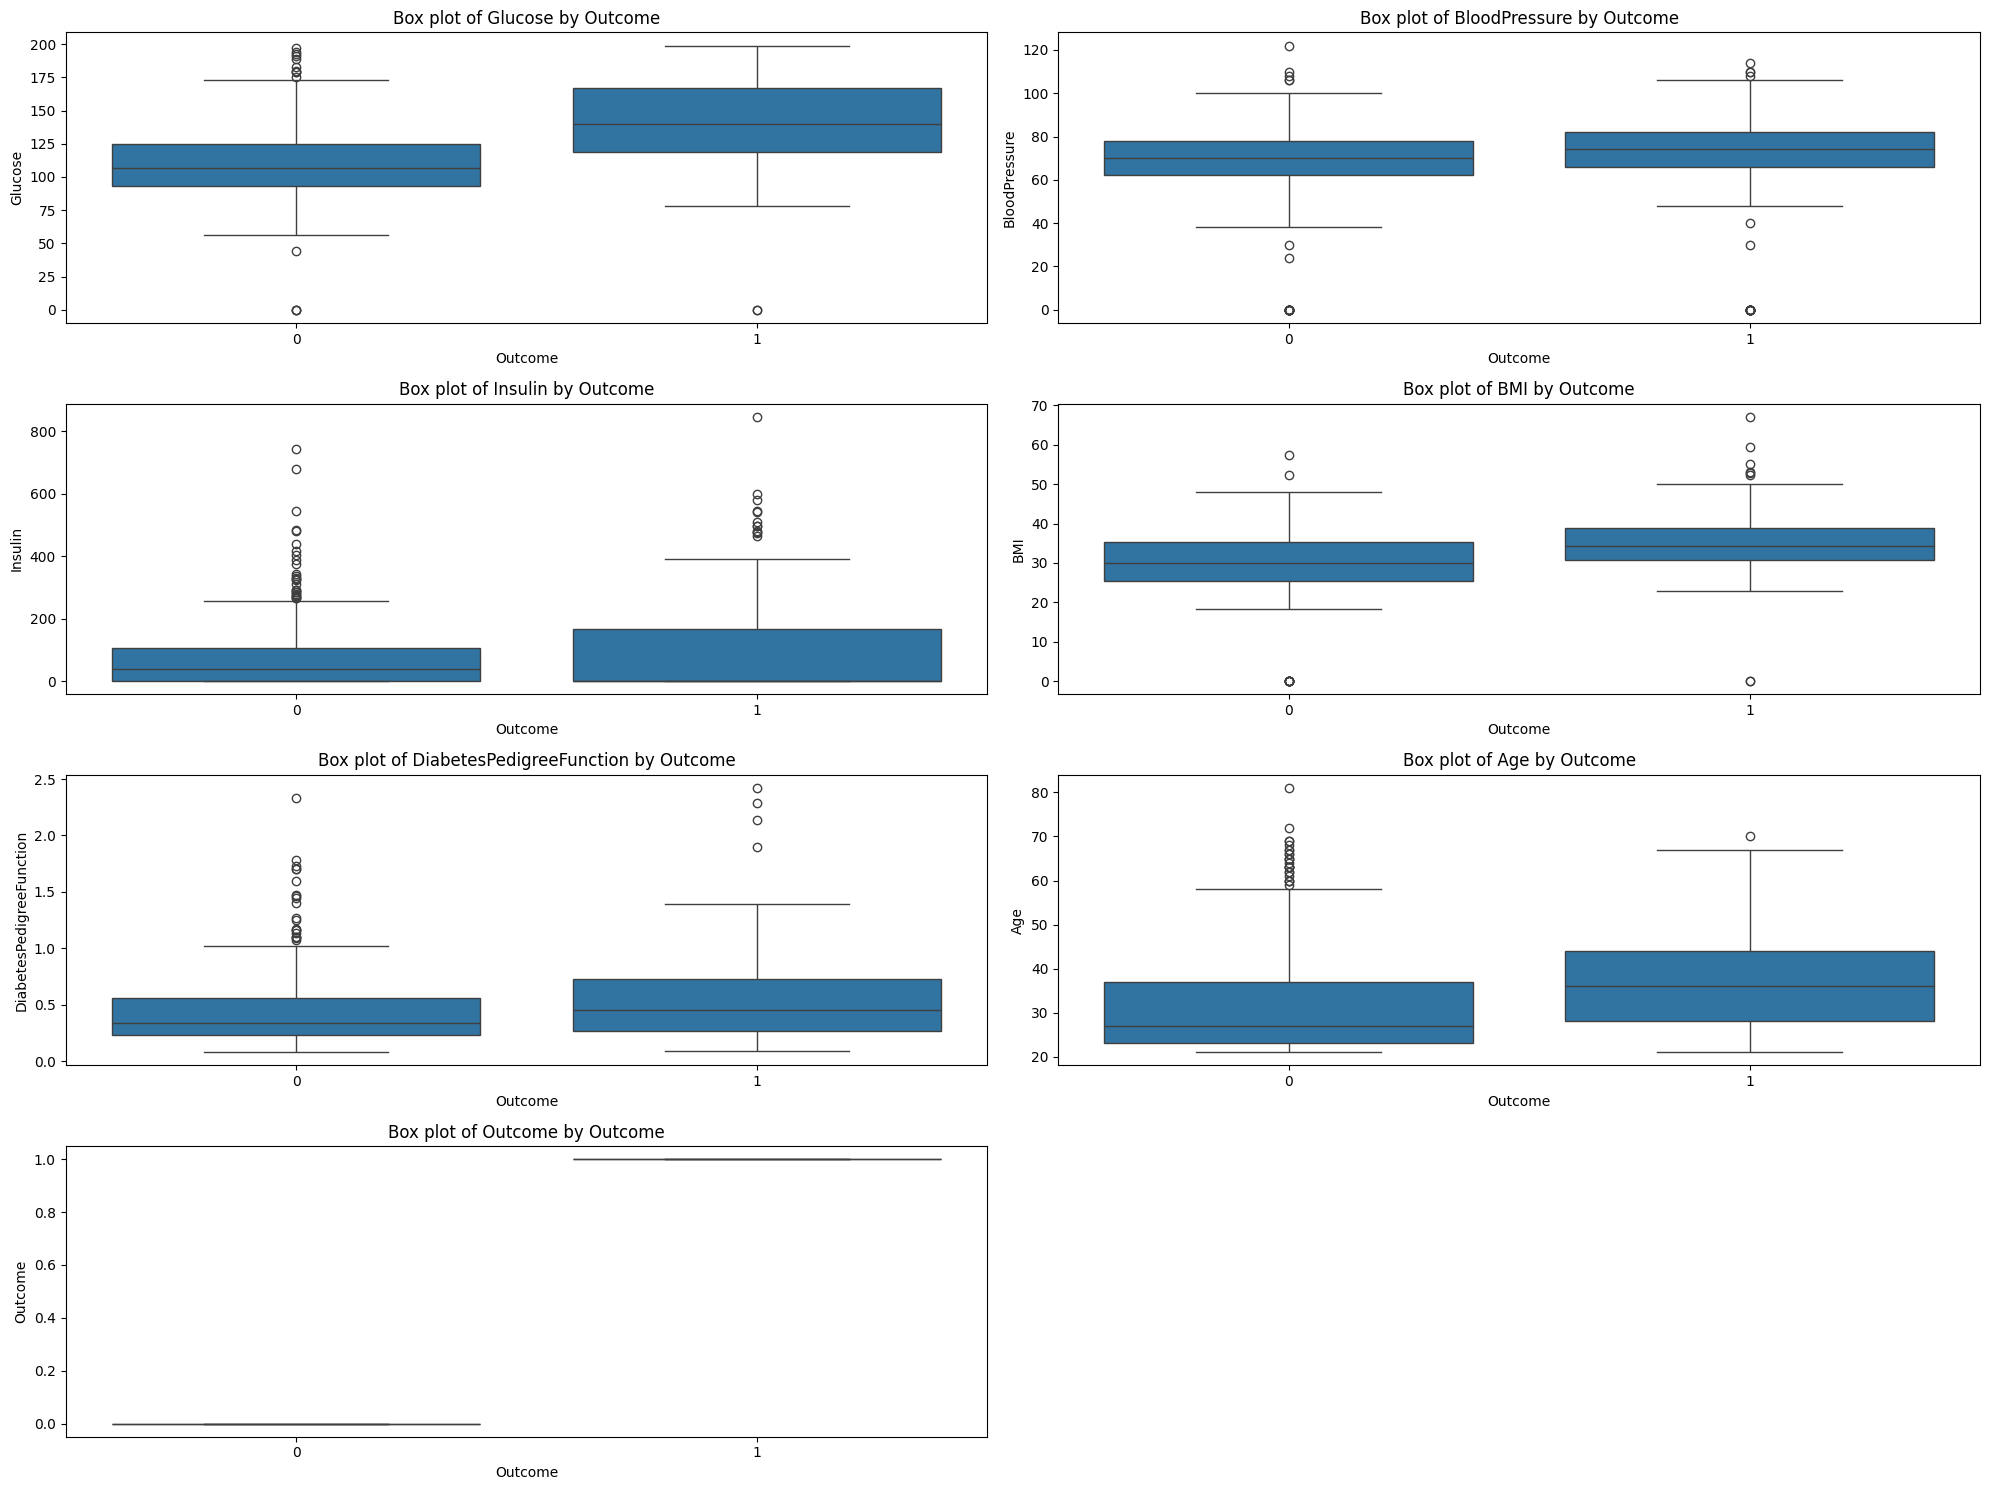

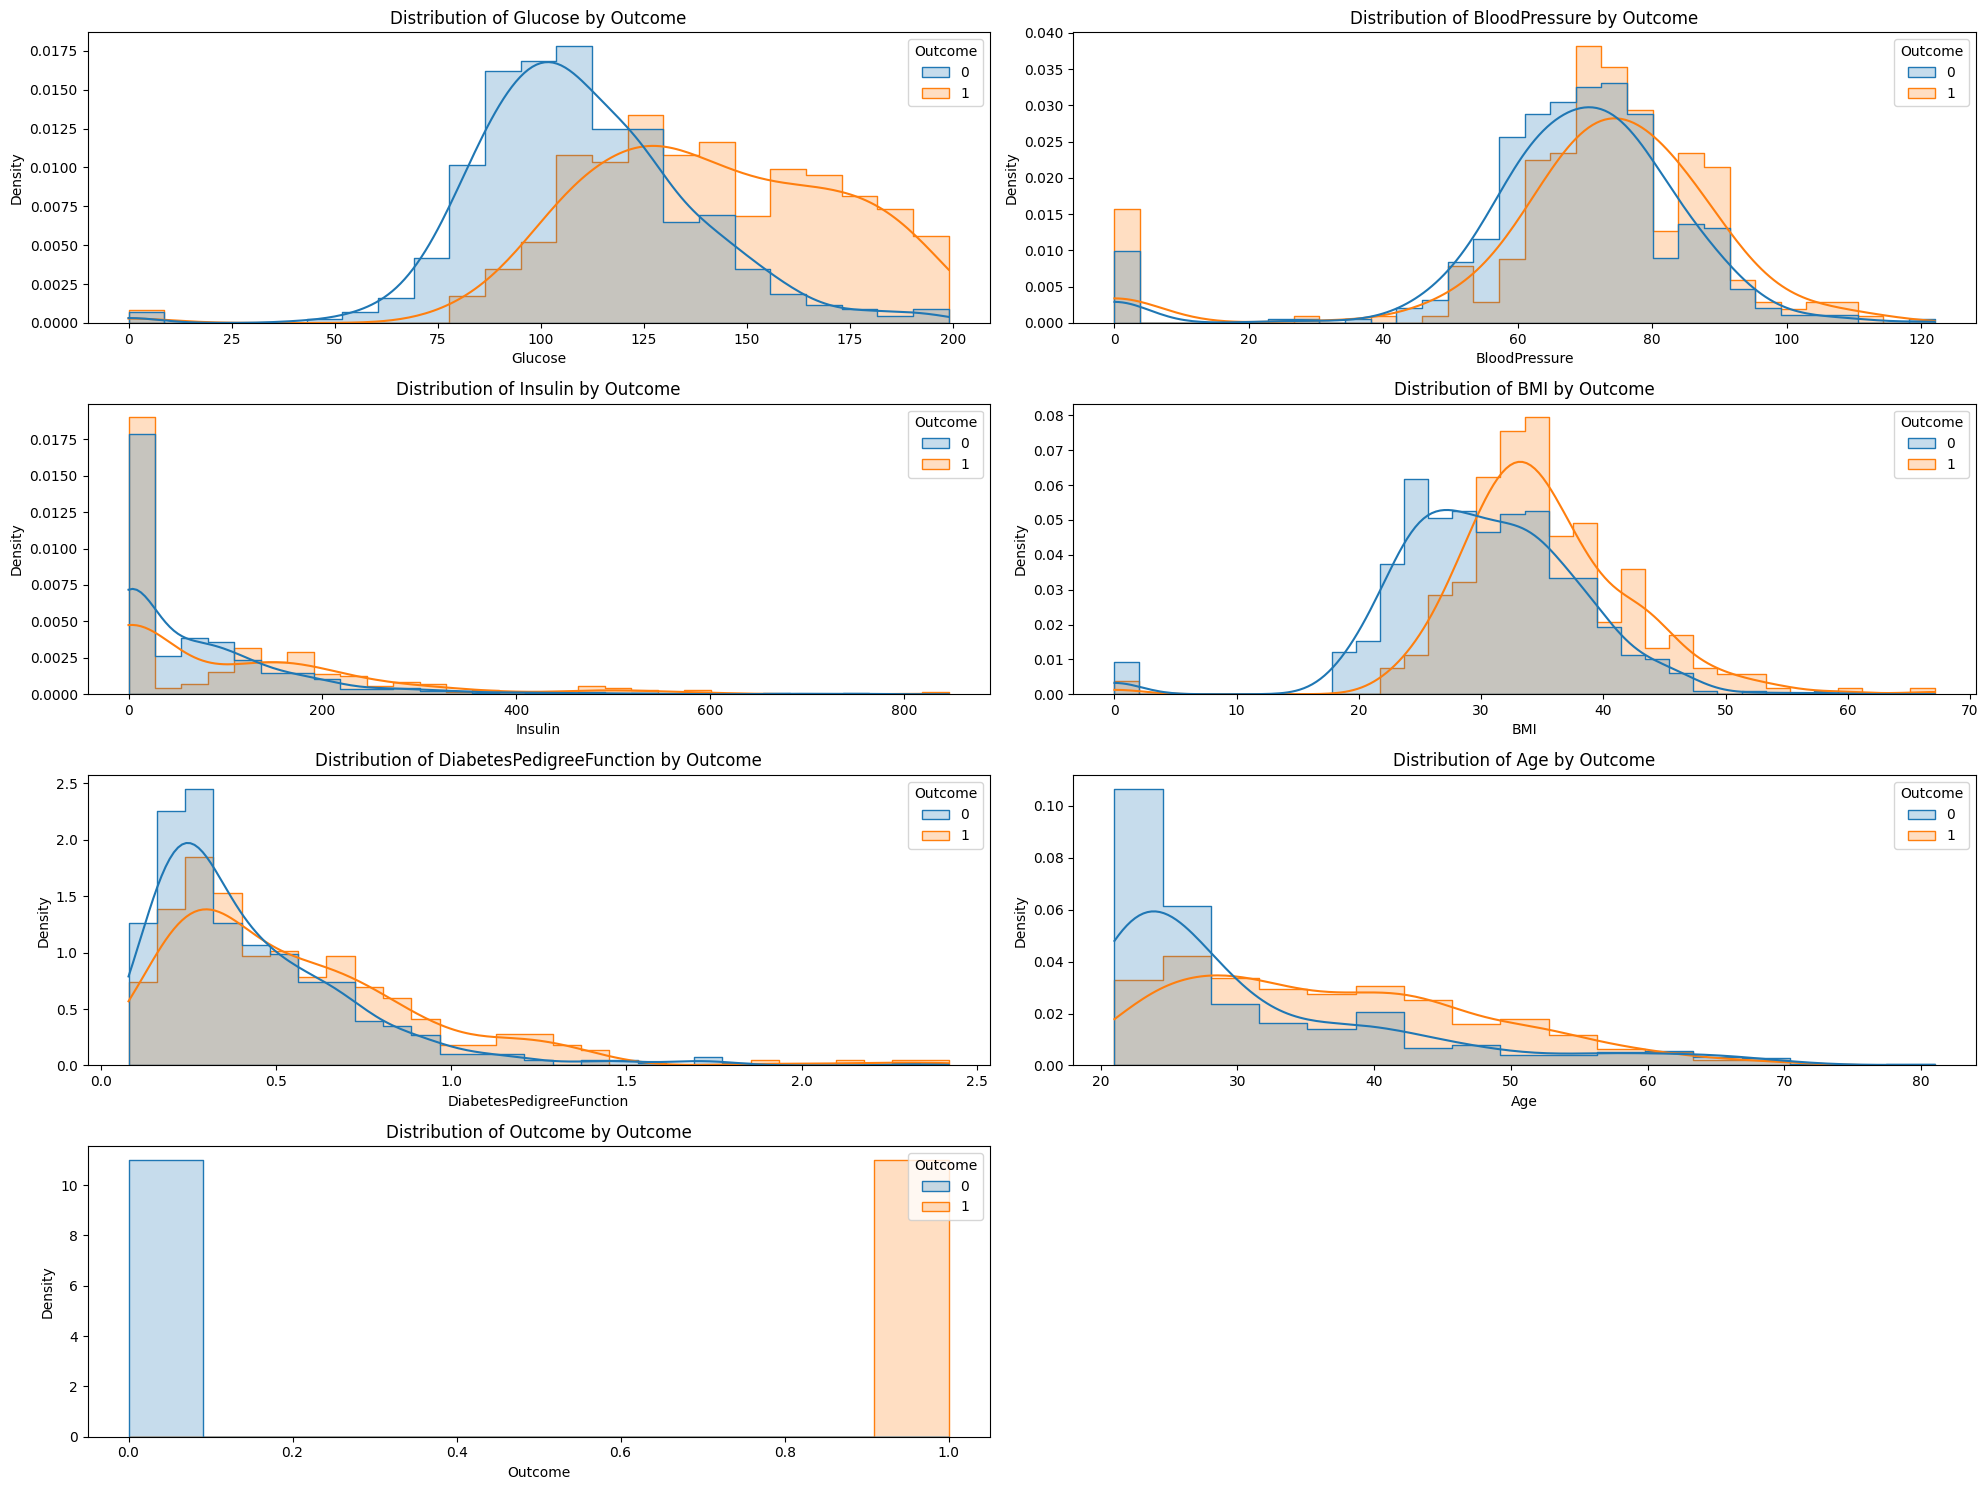

In [5]:
# Membuat box plot untuk semua fitur terhadap outcome
features = df.columns

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'Box plot of {feature} by Outcome')
plt.tight_layout()
plt.show()

# Membuat plot distribusi untuk semua fitur berdasarkan outcome
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 2, i + 1)
    sns.histplot(data=df, x=feature, hue='Outcome', kde=True, element="step", stat="density", common_norm=False)
    plt.title(f'Distribution of {feature} by Outcome')
plt.tight_layout()
plt.show()


<ipython-input-11-d1d92dcfe089>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y='Count', data=outcome_counts, palette='viridis')


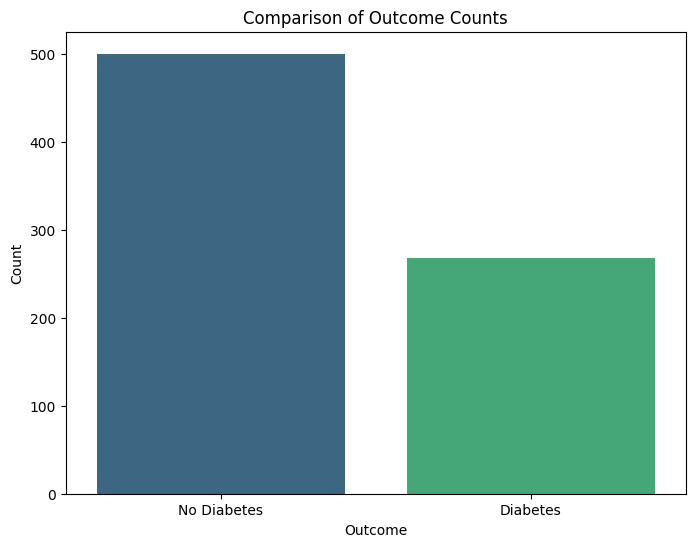

In [11]:
# Menghitung jumlah masing-masing outcome
outcome_counts = df['Outcome'].value_counts().reset_index()
outcome_counts.columns = ['Outcome', 'Count']

# Membuat bar plot untuk membandingkan jumlah outcome 0 dan 1
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Count', data=outcome_counts, palette='viridis')
plt.title('Comparison of Outcome Counts')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()


Confusion Matrix:
[[81 19]
 [14 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       100
           1       0.68      0.74      0.71        54

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.79      0.79       154


Accuracy Score:
0.7857142857142857


<ipython-input-12-6efe491c317c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='viridis')


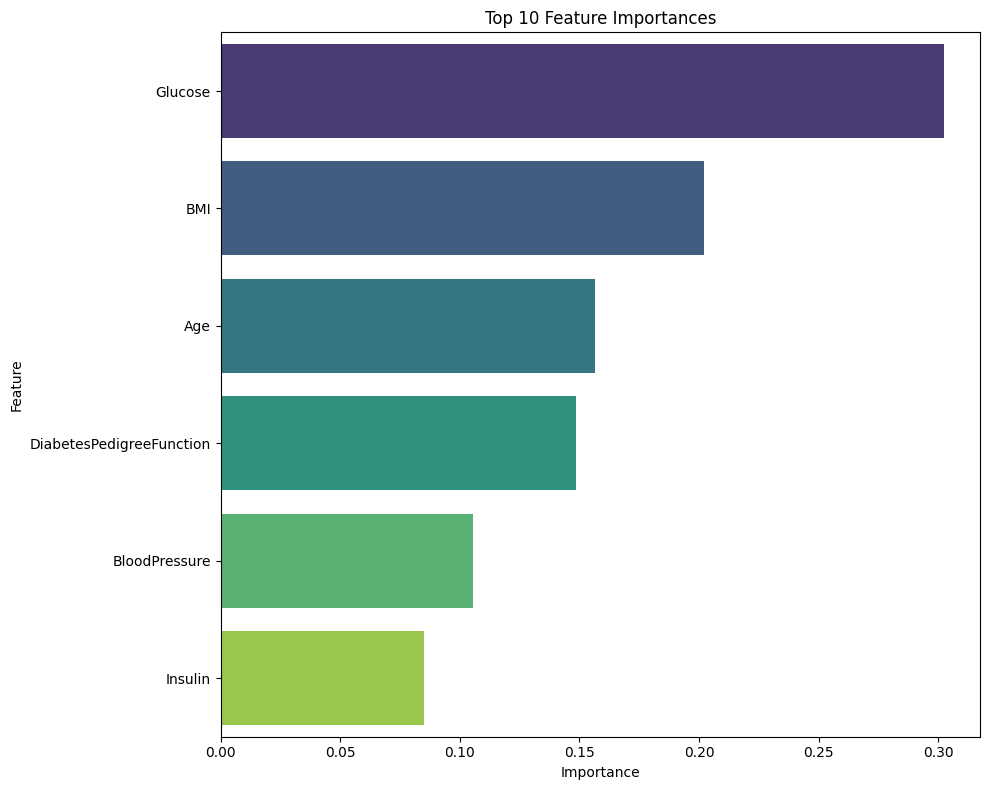

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Fungsi untuk plotting feature importance
def plot_feature_importance(model, features):
    feature_imp = pd.DataFrame({'Feature': features.columns, 'Importance': model.feature_importances_})
    feature_imp = feature_imp.sort_values(by='Importance', ascending=False).head(10)
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='viridis')
    plt.title('Top 10 Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

# Memisahkan fitur dan target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Melakukan oversampling pada data training
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Normalisasi menggunakan StandardScaler
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Membuat model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Melatih model dengan data training yang sudah dioversampling dan dinormalisasi
rf_model.fit(X_train_smote_scaled, y_train_smote)

# Memprediksi data testing
y_pred = rf_model.predict(X_test_scaled)

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Plotting feature importance
plot_feature_importance(rf_model, X_train)
